In [1]:
#Importing all the necessary libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below I have defined a function using regular expression for date and time in our data.

In [2]:
def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

Below I have defined a function using regular expression for author in our data.

In [3]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

Below I have defined a function to split the data points such as date,time,author and message. 

In [4]:
def getDataPoint(line):
    
    
    splitLine = line.split(' - ') 
    
    dateTime = splitLine[0] 
    
    date, time = dateTime.split(', ') 
    
    message = ' '.join(splitLine[1:]) 
    
    if startsWithAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:]) 
    else:
        author = None
    return date, time, author, message

In [5]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe

with open('WhatsApp_chat_updated_football.txt', encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDate(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.head()

,Date,Time,Author,Message
0,07/02/20,15:55,None,"+91 89816 28168 created group ""VP Football"""
1,07/02/20,15:55,None,You were added
2,28/02/20,19:59,+91 80172 73780,"Ki bepar, khela niye kono alochona hocchena keno"
3,28/02/20,20:05,Siddharth,Rohan jholache
4,28/02/20,20:24,Sanchayan,Ami in


In [7]:
df.describe()

,Date,Time,Author,Message
count,15278,15278,15267,15278
unique,130,1224,25,12899
top,15/08/20,00:07,Joyjit Da,<Media omitted>
freq,675,52,3792,538


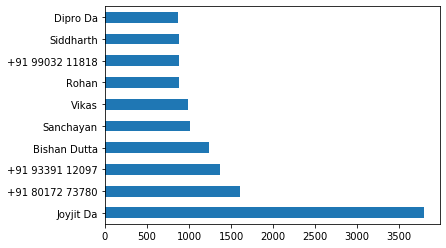

In [8]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot a bar chart using pandas

In [9]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,07/02/20,15:55,None,"+91 89816 28168 created group ""VP Football"""
1,07/02/20,15:55,None,You were added
905,10/03/20,23:19,None,Siddharth left
915,10/03/20,23:37,None,+91 97482 04508 added Siddharth
3400,25/05/20,00:17,None,"Swapnoj changed the subject from ""VP Football""..."


In [10]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())

        Date   Time           Author          Message
17  29/02/20  14:26        Sanchayan  <Media omitted>
38  01/03/20  01:34            Rohan  <Media omitted>
51  03/03/20  14:33            Ribhu  <Media omitted>
56  04/03/20  03:08  +91 97482 04508  <Media omitted>
68  05/03/20  11:05        Sanchayan  <Media omitted>


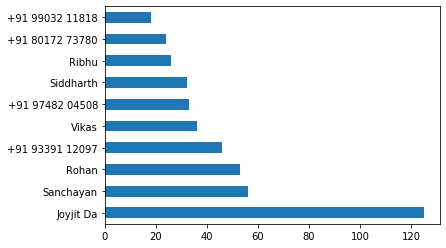

In [11]:
author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()

In [12]:
messages_df = df.drop(null_authors_df.index) # Drops all rows of the data frame containing messages from null authors
messages_df = messages_df.drop(media_messages_df.index) # Drops all rows of the data frame containing media messages
messages_df.head()

,Date,Time,Author,Message
2,28/02/20,19:59,+91 80172 73780,"Ki bepar, khela niye kono alochona hocchena keno"
3,28/02/20,20:05,Siddharth,Rohan jholache
4,28/02/20,20:24,Sanchayan,Ami in
5,28/02/20,20:42,Sanchayan,Hoga game kal?
6,28/02/20,20:51,Siddharth,Me rohan out


In [13]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [15]:
messages_df.head()

,Date,Time,Author,Message,Letter_Count,Word_Count
2,28/02/20,19:59,+91 80172 73780,"Ki bepar, khela niye kono alochona hocchena keno",48,8
3,28/02/20,20:05,Siddharth,Rohan jholache,14,2
4,28/02/20,20:24,Sanchayan,Ami in,6,2
5,28/02/20,20:42,Sanchayan,Hoga game kal?,14,3
6,28/02/20,20:51,Siddharth,Me rohan out,12,3


Text(0, 0.5, 'Authors')

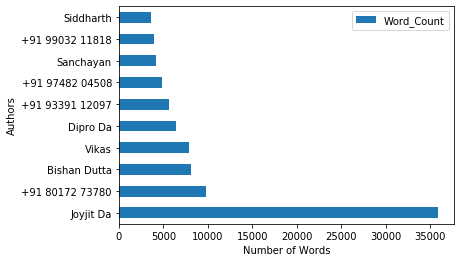

In [16]:
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Authors')

Text(0, 0.5, 'Date')

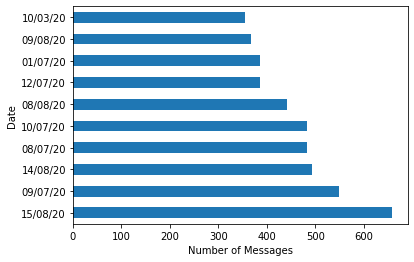

In [17]:
messages_df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Time')

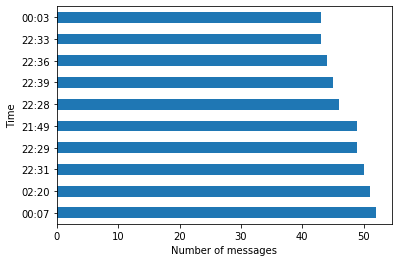

In [18]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

It seems that our Whatsapp group is most active after mid-night.This insight is kind of reliable since most of the football matches here in India starts after midnight usually around 12:30 A.M.